
Logistic Regression Results:
Accuracy: 0.9776
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.92      0.91      0.92       149

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[954  12]
 [ 13 136]]


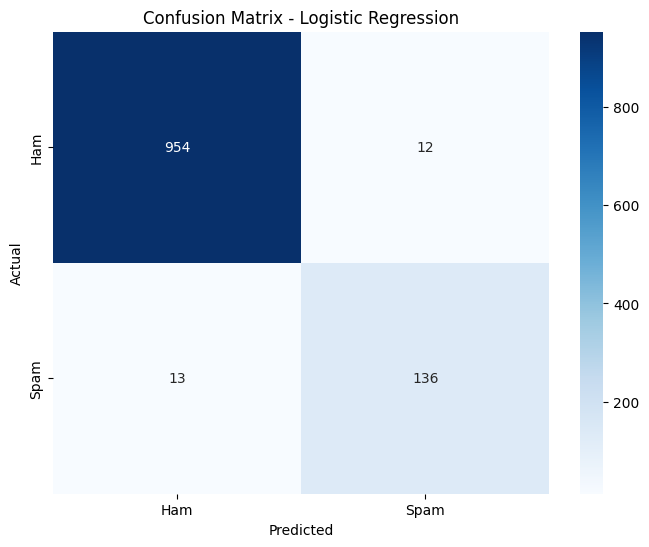

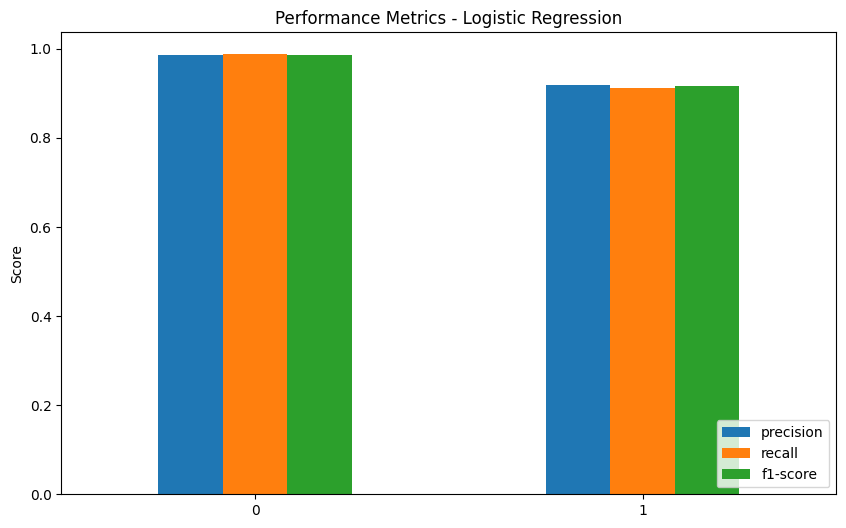

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'spam.csv'  # Update with your actual file path
data = pd.read_csv(file_path, encoding='latin1')  # Adjust encoding if needed

# Encode labels
label_encoder = LabelEncoder()
data['Category_encoded'] = label_encoder.fit_transform(data['Category'])

# Split features (X) and target (y)
X = data['Message']
y = data['Category_encoded']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Function to train a model
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

# Function to predict using a model
def predict_model(model, X_test):
    return model.predict(X_test)

# Function to evaluate and visualize model performance
def evaluate_model_with_visuals(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print textual results
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(conf_matrix)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Visualize precision, recall, F1-score
    metrics_df = pd.DataFrame(report).transpose().iloc[:2, :3]  # Only 'Ham' and 'Spam' rows, Precision/Recall/F1-score
    metrics_df.plot(kind='bar', figsize=(10, 6), title=f"Performance Metrics - {model_name}")
    plt.xticks(rotation=0)
    plt.ylabel("Score")
    plt.legend(loc='lower right')
    plt.show()


# Logistic Regression Workflow
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg = train_model(log_reg, X_train_tfidf, y_train)
y_pred_log_reg = predict_model(log_reg, X_test_tfidf)
evaluate_model_with_visuals(y_test, y_pred_log_reg, "Logistic Regression")